In [1]:
'''
In these files I have performed light cleaning of the dataset before uploading it to S3 AWS.
I correct data types if necessary, and remove obvious duplicates. I tried to make it generic
just incase I need to use the template as a guide to a future cleaning.
'''
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#choose files you want to upload by running the code
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [12]:
#to load dataset into padas dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
#Check for missing values, duplicate entries, and data types:

df.isnull().sum()
df.duplicated().sum()
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [16]:
# Example: Fill missing values or drop them
df.fillna(df.mean(), inplace=True)  # Numerical columns
df.dropna(inplace=True)  # Drop rows with any missing values

# Remove duplicates
df = df.drop_duplicates()

# Correct data types
#df['column_name'] = df['column_name'].astype('desired_type')


<ipython-input-16-22da8d77f49c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Numerical columns
<ipython-input-16-22da8d77f49c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)  # Numerical columns
<ipython-input-16-22da8d77f49c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [18]:
#turns these into binary values so for ML or processing its not difficult. No = 0 Yes = 1
df1 = df
df1 = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df1


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
#basic stats
df1.describe()
'''
age: The ages range from 18 to 64 years, with an average age of about 39 years.
bmi: Body Mass Index (BMI) averages around 30.66 with a range from 15.96 to 53.13, indicating a wide variety of body weights.
children: On average, policyholders have about 1 child, with a maximum of 5.
charges: Charges vary significantly, with a mean of approximately $13,279 and a broad range from $1,121 to $63,770, suggesting varying insurance costs, possibly due to different health risks or coverage plans.
sex_male: This is a binary variable created from the original sex column, where 1 represents male and 0 represents female. The mean of 0.505 suggests a nearly equal distribution of males and females in the dataset.
smoker_yes: Another binary variable indicating whether the policyholder is a smoker, with a mean of about 0.204, suggesting that approximately 20% of the policyholders in the dataset are smokers.
region_northwest, region_southeast, region_southwest: These columns are binary indicators for the policyholder's region, created from the original region column, and they show a fairly even distribution across the different regions, with means ranging from approximately 0.24 to 0.27.
'''

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.204936,0.242334,0.272251,0.243082
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,0.428655,0.445285,0.429104
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


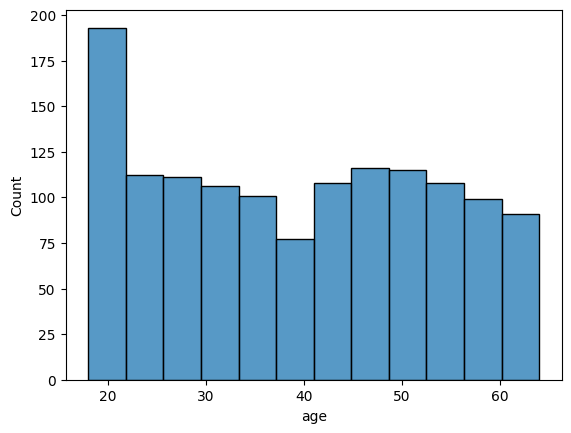

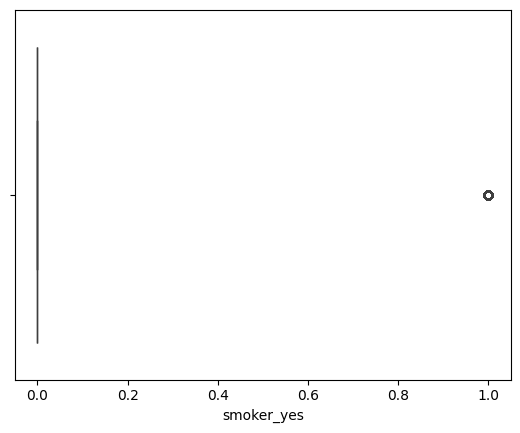

<ipython-input-22-7debd1693c3a>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


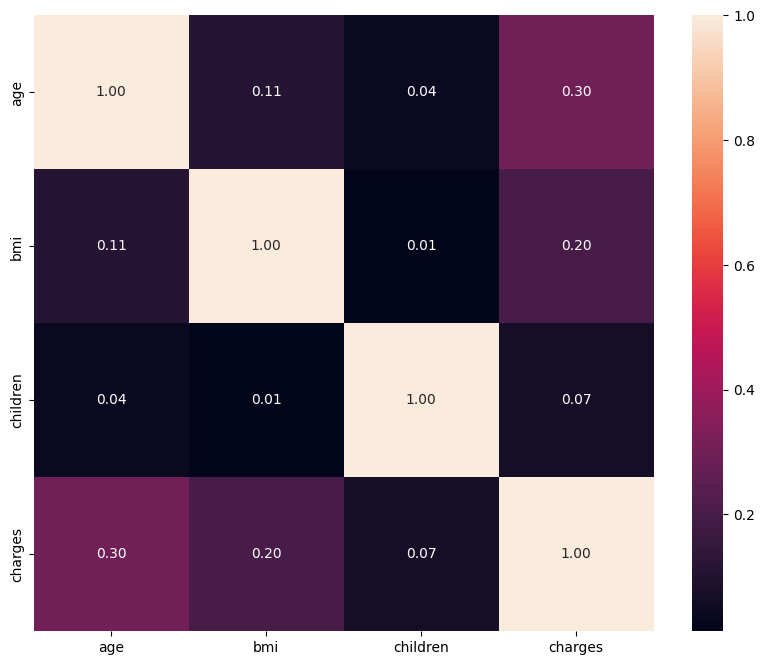

In [22]:
# Histogram
sns.histplot(df1['age'])
plt.show()

# Boxplot
sns.boxplot(x=df1['smoker_yes'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()


In [ ]:

# Convert DataFrame to CSV, without the index
df.to_csv('insurance_data.csv', index=False)

#save file to local device
from google.colab import files
files.download('cleaned_dataset.csv')

'''
note that the data disappears as soon as this is shutdown. You need to reupload always. If you dont want that save it to google dirve for presistence.

from google.colab import drive
drive.mount('/content/drive')

# Specify the path in your Google Drive where you want to save the file
path = '/content/drive/My Drive/cleaned_dataset.csv'

# Save the DataFrame as CSV to the specified path
df.to_csv(path, index=False)

The method above  allows you to access the cleaned dataset from anywhere, as long as you have access to your Google Drive.
'''